# Лабораторная работа 232: Изучение поляризованного света

In [247]:
from rich.console import Console
from rich.panel import Panel
from rich.text import Text
from rich.table import Table

import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

console = Console()

In [248]:
experiment: dict[str, dict[str, np.ndarray]] =\
    {
    "analyzer": {
        "phi": np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]),
        "lux": np.array([2, 5.6, 15.2, 30, 52.5, 73.9, 101.8, 140.1, 165.6, 195.5, 230, 259, 286, 310, 334, 352, 363, 369, 353, 315, 296, 265, 237, 200, 171, 143, 113, 84, 55, 33.3, 20.2, 9.8, 2.3, 2.4])
    },
    "analyzer_and_phase_plate": {
        "phi": np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]),
        "lux": np.array([315, 319, 309, 301, 285, 264, 244, 219, 193, 139, 107, 82, 61, 42.1, 24.4, 13.9, 5.7, 3.6, 6.1, 13.8, 40.2, 75.2, 101, 130, 157, 187, 211, 233, 258, 278, 294, 304, 313, 316])
    },
    "black_mirror_polarizer_angle": {
      "phi": np.array([0, 10, 20, 30, 40, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]),
      "lux": np.array([67.3, 67.4, 63.3, 56.3, 46.6, 34.5, 29.7, 24.8, 19.8, 15.1, 11.1, 7.5, 5, 3.3, 2.7, 3.1, 4.6, 6.9, 10.7, 15.1, 19.3, 25.1, 30.8, 37, 43, 48.4, 53.9, 58.1, 62.4, 65.3, 67.8, 69.1])
    },
    "black_mirror_parallel_angle": {
      "theta": np.array([15, 20, 30, 40, 50, 55, 65, 70]),
      "lux": np.array([17.2, 16.8, 13.8, 9.5, 3.3, 1.3, 16, 35.8])
    },
    "black_mirror_perpendicular_angle": {
      "theta": np.array([15, 25, 35, 45, 55, 65, 70]),
      "lux": np.array([19.4, 31, 40.6, 58.4, 79.2, 128, 213])
    },
    "black_mirror_with_brewster_angle": {
      "beta": np.array([275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455]),
      "lux": np.array([0.8, 2.3, 6.8, 13.5, 29.7, 30.3, 38.5, 45.7, 50.6, 52.2, 50.9, 46.3, 39.7, 30.7, 22.6, 14.6, 7.2, 2.8, 0.8])
    }
}

phi_fourth = 95

In [249]:
for key in experiment.keys():
  try:
    assert (len(experiment[key]["phi"]) == len(experiment[key]["lux"]))
  except KeyError:
    try:
      assert (len(experiment[key]["theta"]) == len(experiment[key]["lux"]))
    except KeyError:
      assert (len(experiment[key]["beta"]) == len(experiment[key]["lux"]))

## Поляризатор + анализатор

In [250]:
phi = np.linspace(0, np.pi, 200)

I_0 = np.max(experiment["analyzer"]["lux"])

[]

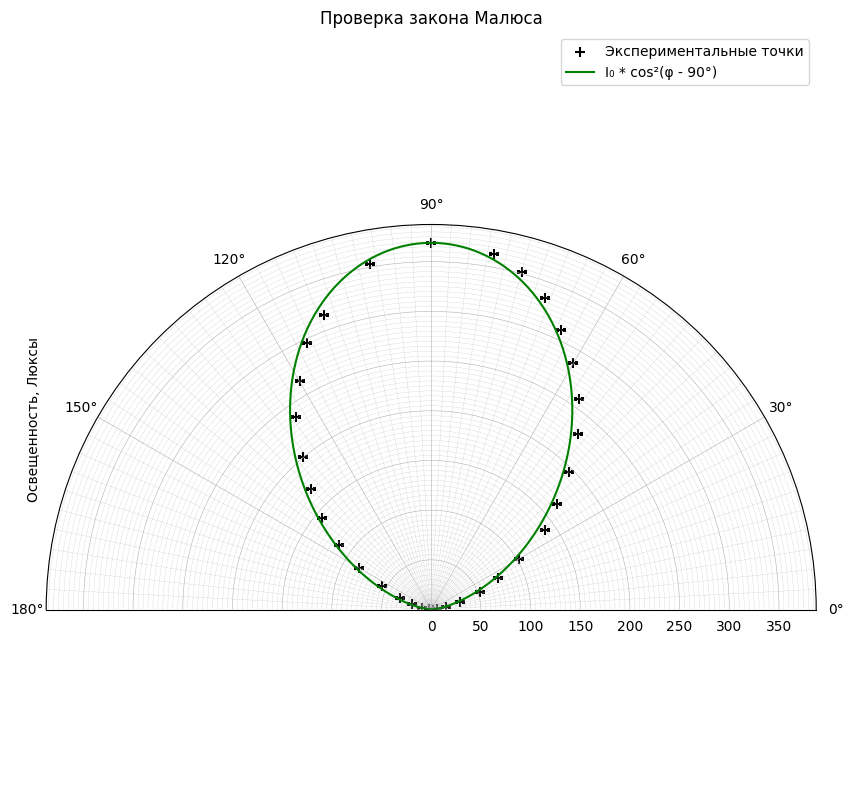

In [251]:
ax = polt.figure(figsize=(12, 10)).add_subplot(projection='polar')

ax.scatter(np.deg2rad(experiment["analyzer"]["phi"]),
           experiment["analyzer"]["lux"],
           marker='+',
           color="black",
           s=45,
           label="Экспериментальные точки")

ax.plot(phi,
        I_0 * np.cos(phi - np.pi / 2)**2,
        label="I₀ * cos²(φ - 90°)",
        color="green")

ax.set_title("Проверка закона Малюса")
ax.set_ylabel("Освещенность, Люксы ")

ax.set_xlim(0, np.pi)

ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.plot()

## Фазовая пластинка установлена под 45° к главным осям

In [252]:
phi = np.linspace(0, np.pi, 200)

I_0 = np.max(experiment["analyzer_and_phase_plate"]["lux"])

[]

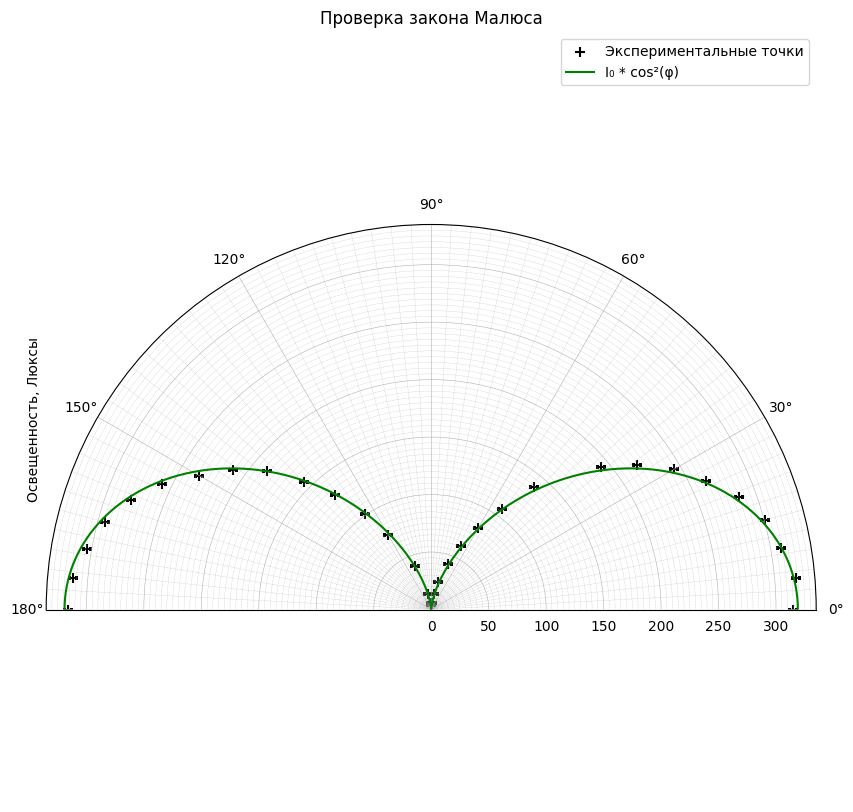

In [253]:
ax = polt.figure(figsize=(12, 10)).add_subplot(projection='polar')

ax.scatter(np.deg2rad(experiment["analyzer_and_phase_plate"]["phi"]),
           experiment["analyzer_and_phase_plate"]["lux"],
           marker='+',
           color="black",
           s=45,
           label="Экспериментальные точки")

ax.plot(phi,
        I_0 * np.cos(phi)**2,
        label="I₀ * cos²(φ)",
        color="green")

ax.set_title("Проверка закона Малюса")
ax.set_ylabel("Освещенность, Люксы ")

ax.set_xlim(0, np.pi)

ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.plot()

## Черное зеркало

### Интенсивность отраженного при угле падения 50° света от угла поворота поляризатора

In [254]:
phi = np.linspace(0, np.pi, 200)

I_0 = np.max(experiment["black_mirror_polarizer_angle"]["lux"])

[]

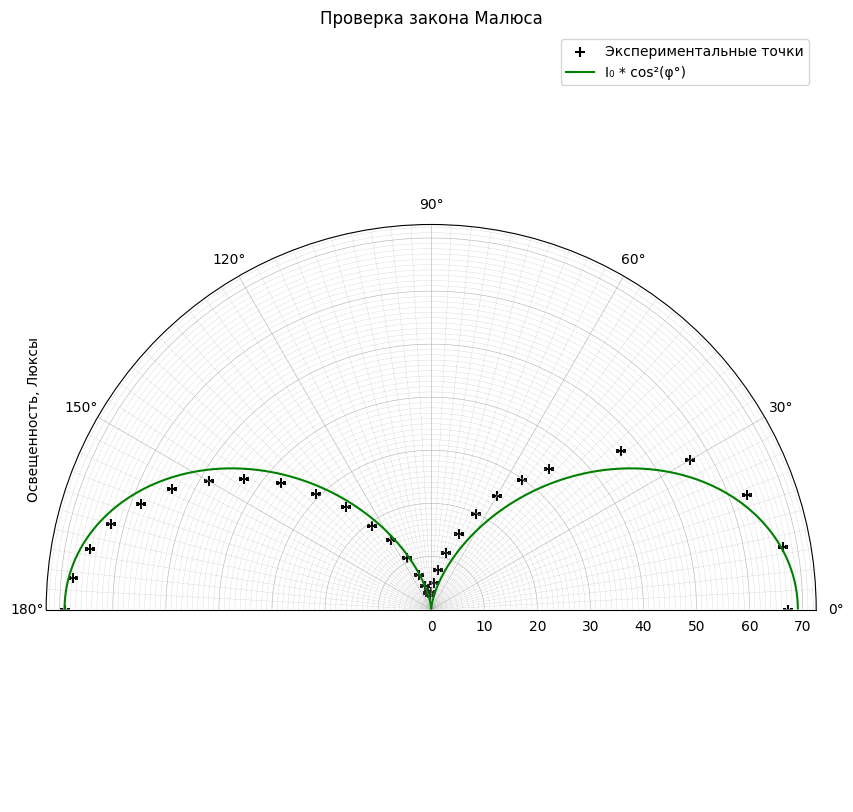

In [255]:
ax = polt.figure(figsize=(12, 10)).add_subplot(projection='polar')

ax.scatter(np.deg2rad(experiment["black_mirror_polarizer_angle"]["phi"]),
           experiment["black_mirror_polarizer_angle"]["lux"],
           marker='+',
           color="black",
           s=45,
           label="Экспериментальные точки")

ax.plot(phi,
        I_0 * np.cos(phi)**2,
        label="I₀ * cos²(φ°)",
        color="green")

ax.set_title("Проверка закона Малюса")
ax.set_ylabel("Освещенность, Люксы ")

ax.set_xlim(0, np.pi)

ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.plot()

## Интенсивность отраженного под углом Брюстера 60° света от угла поворота поляризатора

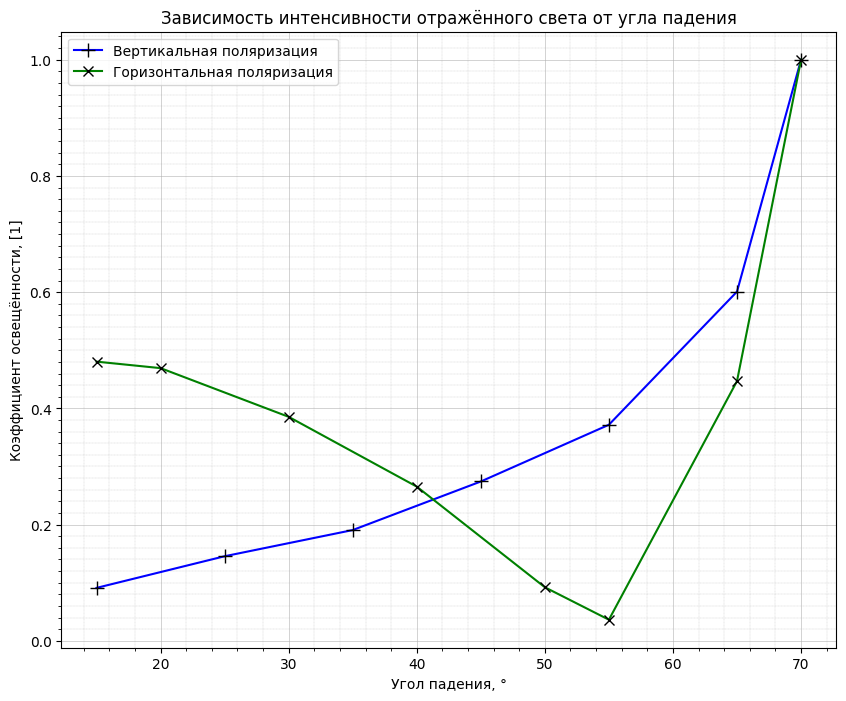

In [256]:
_, ax = polt.subplots(figsize=(10, 8))

I_0 = np.max(experiment["black_mirror_perpendicular_angle"]["lux"])

# Вертикальная поляризация
ax.plot(experiment["black_mirror_perpendicular_angle"]["theta"],
        experiment["black_mirror_perpendicular_angle"]["lux"] / I_0,
        marker='+',
        color="blue",
        markersize=10,
        markeredgecolor='black',
        label="Вертикальная поляризация")

I_0 = np.max(experiment["black_mirror_parallel_angle"]["lux"])

# Горизонтальная поляризация
ax.plot(experiment["black_mirror_parallel_angle"]["theta"],
        experiment["black_mirror_parallel_angle"]["lux"] / I_0,
        marker='x',
        color="green",
        markersize=7.5,
        markeredgecolor='black',
        label="Горизонтальная поляризация")

ax.set_title("Зависимость интенсивности отражённого света от угла падения")
ax.set_xlabel("Угол падения, °")
ax.set_ylabel("Коэффициент освещённости, [1]")

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

ax.grid(which='minor', linestyle='--', linewidth=0.2)
ax.grid(which='major', linewidth=0.4)

polt.legend()
# polt.tight_layout()
polt.show()

## Интенсивность прошедшего через поляризатор отраженного света подчиняется закону Малюса

In [257]:
beta = np.linspace(0, np.pi, 200)

I_0 = np.max(experiment["black_mirror_with_brewster_angle"]["lux"])

[]

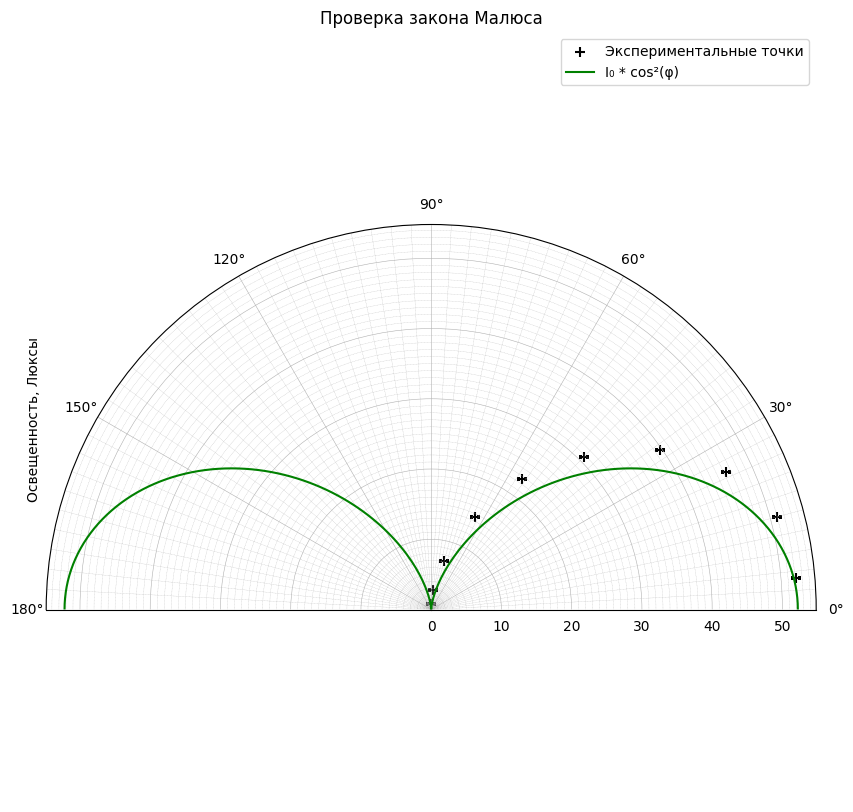

In [258]:
ax = polt.figure(figsize=(12, 10)).add_subplot(projection='polar')

ax.scatter(np.deg2rad(experiment["black_mirror_with_brewster_angle"]["beta"]),
           experiment["black_mirror_with_brewster_angle"]["lux"],
           marker='+',
           color="black",
           s=45,
           label="Экспериментальные точки")

ax.plot(beta,
        I_0 * np.cos(beta)**2,
        label="I₀ * cos²(φ)",
        color="green")

ax.set_title("Проверка закона Малюса")
ax.set_ylabel("Освещенность, Люксы ")

ax.set_xlim(0, np.pi)

ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.plot()